In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('CC GENERAL.csv')

This project requires to develop a customer segmentation to define marketing strategy.

The file is at a customer level with 18 behavioral variables.

In [2]:
# Data Exploration 

data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#preprocessing
data.drop(['CUST_ID','MINIMUM_PAYMENTS'],  axis=1, inplace=True)

In [7]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].interpolate(method = 'linear')

In [42]:
x = data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE']]

In [43]:
x.shape

(8950, 5)

In [44]:
x.duplicated().sum()

0

In [45]:
# scale with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

<Figure size 1080x576 with 0 Axes>

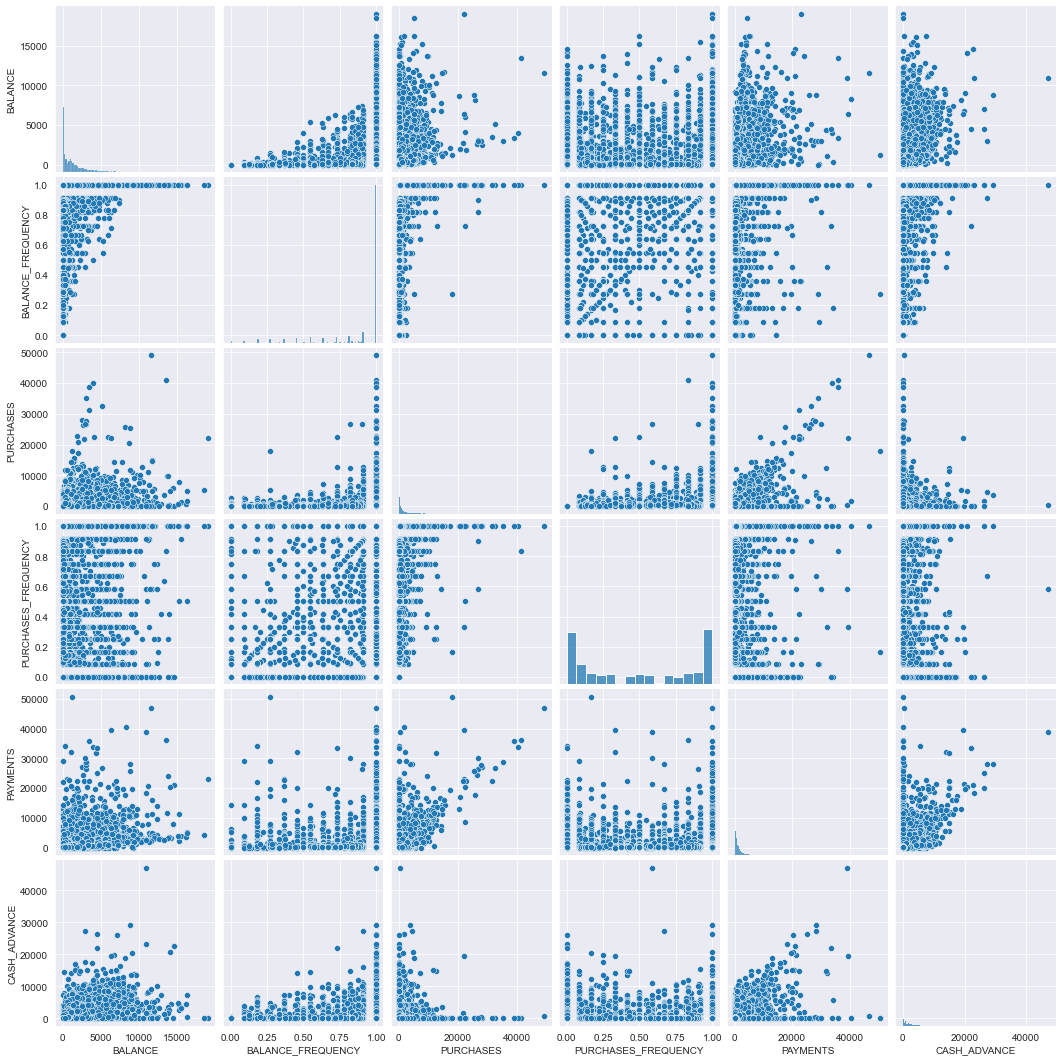

In [46]:
# Let's do a pairplot using seaborn to visualize if we can get distinct groups from the data

import seaborn as sb
sb.set_style('darkgrid')
plt.figure(figsize=(15,8))

cols_to_plot = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','PURCHASES_FREQUENCY', 'PAYMENTS', 'CASH_ADVANCE']
sb.pairplot(data[cols_to_plot])

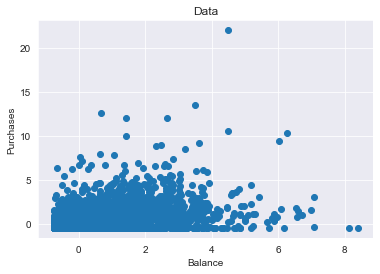

In [47]:
# Let's visualize if there's an existing cluster in the data

plt.scatter(x_scaled[:,0],x_scaled[:,4])
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Data')
plt.show()

## AgglomerativeClustering

In [48]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(x_scaled)
agg_clusters

array([0, 0, 1, ..., 1, 0, 2])

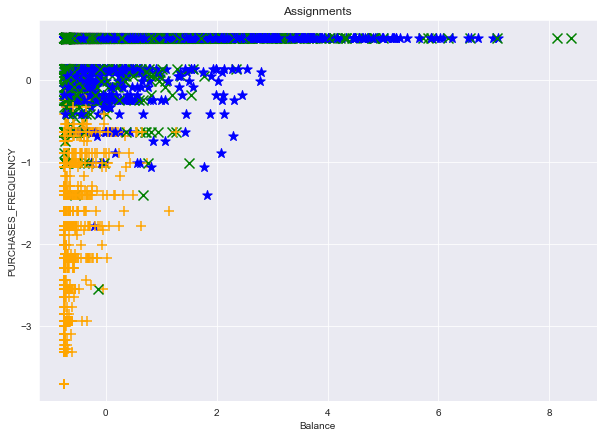

In [49]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,7))
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Balance')
    plt.ylabel('PURCHASES_FREQUENCY')
    plt.title('Assignments')
    plt.show()

plot_clusters(x_scaled, agg_clusters)

In [50]:
# verify how good the clustering is using silhouette score

from sklearn.metrics import silhouette_score

print(silhouette_score(x_scaled, agg_clusters))


0.34224543818536


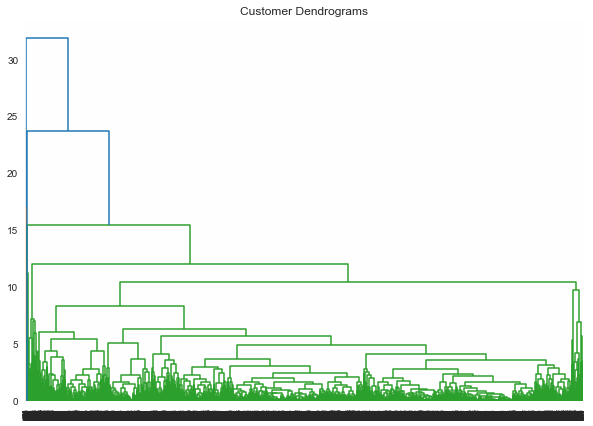

In [52]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(x_scaled, method="complete"))

K- Means Clustering


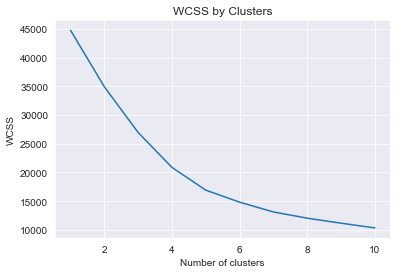

In [54]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(x_scaled)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(x_scaled)
# View the cluster assignments
km_clusters

array([2, 2, 1, ..., 1, 2, 1], dtype=int32)

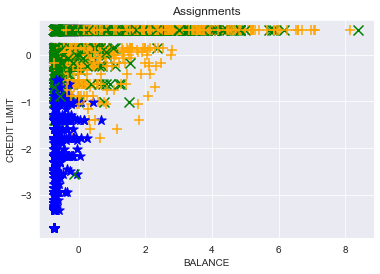

In [57]:
## Let's plot the clusters

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('BALANCE')
    plt.ylabel('CREDIT LIMIT')
    plt.title('Assignments')
    plt.show()

plot_clusters(x_scaled, km_clusters)

In [58]:
from sklearn.metrics import silhouette_score

print(silhouette_score(x_scaled, km_clusters))

0.3726930017236412


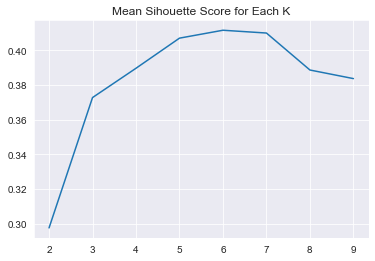

In [59]:
# Let's iterate through diff nos of clusters and check the ss
silhouette = []

for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(x_scaled)
    label=model.predict(x_scaled)
    silhouette.append(silhouette_score(x_scaled,label))
    

ax = plt.plot(silhouette)
plt.xticks(range(8), range(2,10))
plt.title("Mean Sihouette Score for Each K")
plt.show()
